# Machine Learning - Regression Analysis

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Hypothesis
#### 4. Data Prep For Regression Analysis - GDP
#### 5. Regression Analysis- GDP
#### 6. GDP Analysis
#### 7. Data Prep For Regression Analysis - Corruption
#### 8. Regression Analysis- Corruption
#### 9. Corruption Analysis

### 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [8]:
 path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [10]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Data Immersion\\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [12]:
happy = pd.read_pickle(os.path.join(path, 'data', 'happy_cleaned.pkl'))

In [14]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 2. Data Cleaning 

In [17]:
happy.shape

(156, 9)

In [19]:
happy.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [21]:
dup = happy.duplicated()

In [23]:
dup.shape

(156,)

### 3. Hypothesis


- The more a country spends on GDP the higher the happiness score

- The higher the perception of corruption, the lower the happiness score

### 4. Data Prep For Regression Analysis - GDP

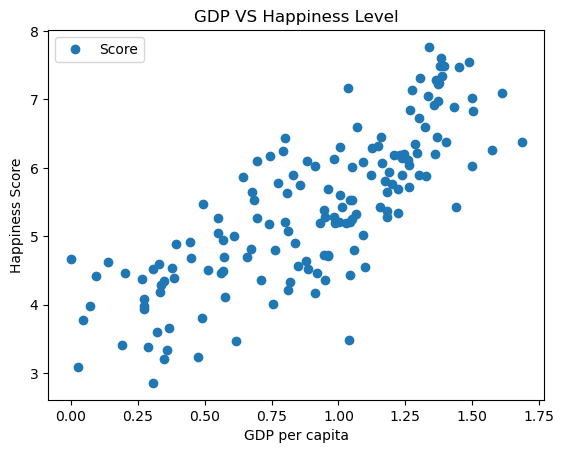

In [29]:
# Scatterplot for the GDP Hypothesis

happy.plot(x = 'GDP per capita', y='Score',style='o') 
plt.title('GDP VS Happiness Level')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness Score')  
plt.show()
plt.tight_layout()
plt.savefig('GDP_Regression', dpi=300, bbox_inches='tight')

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = happy['GDP per capita'].values.reshape(-1,1)
y = happy['Score'].values.reshape(-1,1)

In [33]:
X

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [35]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5.Regression Analysis- GDP

In [40]:
# Create a regression object.

regression = LinearRegression()

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

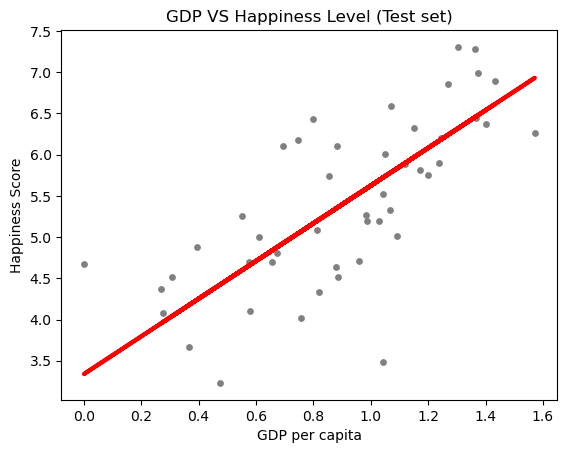

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP VS Happiness Level (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plot_test.show()
plt.tight_layout()
plt.savefig('GDP_Regression_line', dpi=300, bbox_inches='tight')

In [48]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28560657]]
Mean squared error:  0.5168179896793245
R2 score:  0.49218256470476307


In [52]:
y_predicted

array([[5.16746232],
       [6.16627239],
       [6.18684285],
       [5.34802524],
       [6.46568686],
       [6.31712243],
       [5.35488206],
       [5.53315938],
       [4.66005767],
       [5.04175396],
       [5.59487075],
       [5.73886397],
       [4.65091524],
       [4.04294389],
       [5.89885643],
       [5.71829351],
       [6.9319506 ],
       [5.36402449],
       [4.92518803],
       [3.95151963],
       [4.17550907],
       [6.45883004],
       [5.06461003],
       [6.01999357],
       [3.33897707],
       [4.4269258 ],
       [4.59834629],
       [5.29317069],
       [5.58572833],
       [5.19717521],
       [6.47711489],
       [6.23941181],
       [5.21317446],
       [4.73548268],
       [5.7845761 ],
       [5.77771928],
       [4.23722045],
       [4.87719029],
       [5.69086623],
       [6.54568309],
       [4.84062058],
       [3.96751888],
       [5.83485944],
       [6.61425128],
       [6.08399056],
       [5.96513902],
       [5.72515033]])

In [54]:
# Create a dataframe comparing the actual and predicted values of y.

data_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_test.head(30)

,Actual,Predicted
0,6.436,5.167462
1,5.893,6.166272
2,6.198,6.186843
3,4.639,5.348025
4,6.446,6.465687
5,7.307,6.317122
6,6.100,5.354882
7,4.707,5.533159
8,4.107,4.660058
9,6.174,5.041754


### 6. GDP Analysis

The regression analysis proves the hypothesis to be true. There is a strong positive correlations between both variables. As the GDP per capita increases, so does the level of happiness. 
<BR> The slope score is also a positive, providing another indicator the hypothesis is true.
<BR> The mean squared and R2 provides evidence of the regression analysis having a good fit, meaning the model can accurately predict the influence of GPD on the happiness levels 


### 7. Data Prep For Regression Analysis - Corruption

<Figure size 640x480 with 0 Axes>

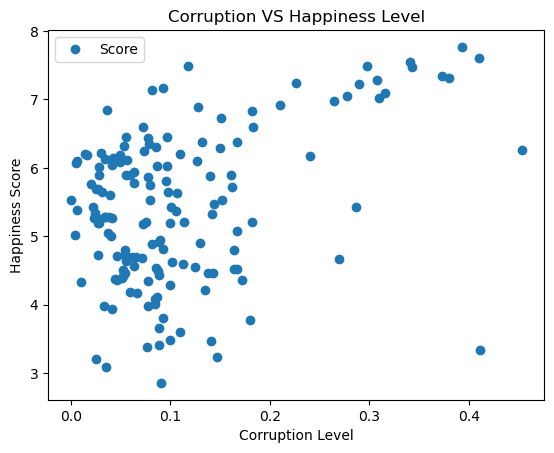

In [59]:
# Scatterplot for the corruption Hypothesis

happy.plot(x = 'Perceptions of corruption', y='Score',style='o')
plt.title('Corruption VS Happiness Level')  
plt.xlabel('Corruption Level')  
plt.ylabel('Happiness Score')  
plt.show()
plt.tight_layout()
plt.savefig('Corruption_Regression', dpi=300, bbox_inches='tight')

In [61]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = happy['Perceptions of corruption'].values.reshape(-1,1)
y = happy['Score'].values.reshape(-1,1)

In [63]:
X

array([[0.393],
       [0.41 ],
       [0.341],
       [0.118],
       [0.298],
       [0.343],
       [0.373],
       [0.38 ],
       [0.308],
       [0.226],
       [0.29 ],
       [0.093],
       [0.082],
       [0.316],
       [0.278],
       [0.31 ],
       [0.265],
       [0.21 ],
       [0.128],
       [0.036],
       [0.182],
       [0.151],
       [0.073],
       [0.183],
       [0.097],
       [0.056],
       [0.078],
       [0.132],
       [0.167],
       [0.079],
       [0.054],
       [0.086],
       [0.15 ],
       [0.453],
       [0.074],
       [0.03 ],
       [0.11 ],
       [0.014],
       [0.016],
       [0.05 ],
       [0.24 ],
       [0.042],
       [0.034],
       [0.057],
       [0.127],
       [0.006],
       [0.05 ],
       [0.005],
       [0.041],
       [0.087],
       [0.097],
       [0.028],
       [0.064],
       [0.056],
       [0.161],
       [0.028],
       [0.06 ],
       [0.14 ],
       [0.078],
       [0.096],
       [0.064],
       [0.02 ],
       [

In [65]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [67]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Regression Analysis- Corruption

In [70]:
# Create a regression object.

regression = LinearRegression()

In [72]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [74]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

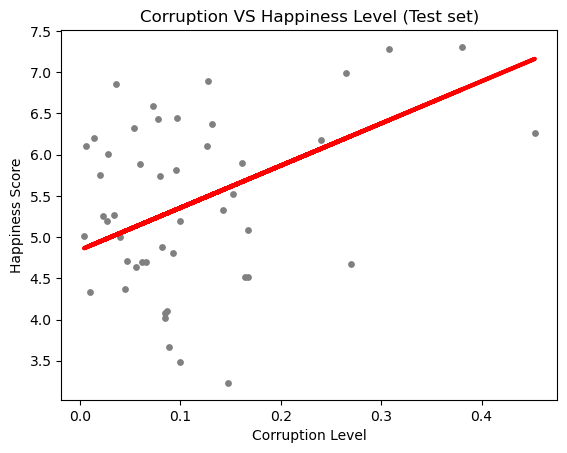

In [76]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Corruption VS Happiness Level (Test set)')
plot_test.xlabel('Corruption Level')
plot_test.ylabel('Happiness Score')
plot_test.show()
plt.tight_layout()
plt.savefig('Corruption_Regression_line', dpi=300, bbox_inches='tight')

In [78]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [80]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.11823339]]
Mean squared error:  0.9534495657105875
R2 score:  0.06315507042831225


In [82]:
y_predicted

array([[5.24316211],
       [5.66797548],
       [4.91559518],
       [5.13056098],
       [5.34040855],
       [6.7888686 ],
       [4.87464931],
       [5.08449688],
       [5.28922621],
       [6.07231592],
       [4.98213221],
       [4.98725044],
       [5.16127038],
       [5.69868488],
       [5.15103391],
       [5.35576325],
       [7.16249963],
       [5.68333018],
       [5.49395555],
       [5.07426041],
       [5.29946268],
       [6.42035579],
       [5.27898975],
       [5.33529031],
       [6.22586292],
       [5.59632022],
       [4.96165928],
       [5.25339858],
       [5.01795984],
       [5.69868488],
       [6.20027176],
       [5.02819631],
       [4.89512224],
       [5.04866924],
       [5.21757095],
       [5.57072905],
       [5.26363505],
       [5.31993561],
       [5.35576325],
       [5.51954672],
       [5.18174331],
       [5.27898975],
       [4.86441284],
       [5.49907378],
       [4.94630458],
       [5.12032451],
       [5.62191138]])

In [84]:
# Create a dataframe comparing the actual and predicted values of y.

data_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_test.head(30)

,Actual,Predicted
0,6.436,5.243162
1,5.893,5.667975
2,6.198,4.915595
3,4.639,5.130561
4,6.446,5.340409
5,7.307,6.788869
6,6.100,4.874649
7,4.707,5.084497
8,4.107,5.289226
9,6.174,6.072316


### 9. Corruption Analysis

From a quick glance at the regression analysis it might seem there is a positive correlation between both variables and the hypothesis is proved to be true, however we need to take into consideration the R2 and mean squared error score.
<BR> The high level of mean squared and low R2 score suggests the data does not fit the model and there is show errors with the predictions. The means there is a weak relationshiop between both variables and the hypothesis is not true.